# 尝试做一个分类器

In [6]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import random

In [63]:
class SGDClassifier(object):
    def __init__(self, train_size, max_iter):
        self.train_size = int(train_size)
        self.learning_rate = 1
        self.max_iter = max_iter
        self.batch_size = int(train_size - 1)
        self.theta = np.array([1.0, 1.0])
    
    def train(self, x_train, y_train):
        # 初始化
        num_samples = len(x_train[0])
        pred_y = np.zeros(len(x_train[0]))
        loss = np.zeros(self.max_iter)
        tag = 0
        for i in range(self.max_iter):
            # 从x_list中随机选择train_size个样本，返回选中的x_list的元素位置
            batch_idxs = np.random.choice(len(x_train[0]), self.batch_size)
            x_train_batch = np.array([x_train[:, j] for j in batch_idxs]).T
            y_train_batch = np.array([y_train[j] for j in batch_idxs])
            self.cal_step_gradient(x_train_batch, y_train_batch)
            #print('b:{0}, w:{1}'.format(self.theta[1], self.theta[0]))
            # eval_loss()函数是一个评价函数，评价损失函数
            #print('loss is {0}'.format(self.eval_loss(x_train, y_train)))
            loss[i] = self.eval_loss(x_train, y_train)
        print('loss is {0}'.format(self.eval_loss(x_train, y_train)))
        itera = np.array(range(self.max_iter))
        plt.plot(itera, loss)
        plt.show()
    
    def cal_step_gradient(self, x_train_batch, y_train_batch):
        avg_dtheta = np.array([0.0, 0.0])
        for i in range(self.batch_size):
            pred_y = self.hypothesis(x_train_batch[:, i])  # 计算预测值
            dw, db = self.gradient(pred_y, y_train_batch[i], x_train_batch[:, i])  # 计算当前步的梯度
            avg_dtheta[1] += db
            avg_dtheta[0] += dw
        avg_dtheta[1] /= self.batch_size
        avg_dtheta[0] /= self.batch_size
        self.theta[1] -= self.learning_rate * avg_dtheta[1]
        self.theta[0] -= self.learning_rate * avg_dtheta[0]
            
    def hypothesis(self, x_train):
        pred_y = self.theta @ x_train
        pred_y = 1 / (1 + np.exp(-pred_y))
        return pred_y
    
    # gradient: get dw & db
    # 这里应该是得到损失函数关于各个参数的导数，dJ/dw 和 dJ/db
    def gradient(self, pred_y, gt_y, x):
        diff = pred_y - gt_y   # 这里对应的是损失函数的导数，gt_y = ground true 真实值，已知的
        dw = diff * x[0]          # pred_y 是hypothesis算出来的
        db = diff
        return dw, db
    
    # 评价函数,其实计算的是损失函数
    def eval_loss(self, x_train, y_train):
        avg_loss = 0.0
        avg_loss = np.mean(0.5 * (self.hypothesis(x_train) - y_train) ** 2)
        return avg_loss
    
    
    def pred(self, x_train):
        pred_y = self.hypothesis(x_train)
        return pred_y

In [64]:
# 生成样本数据
def gen_sample_data(theta, num_samples):
    x_list = np.array([[i, 1] for i in range(int(-num_samples / 2), int(num_samples / 2))]).T
    print('x_list:',x_list)
    y_list = theta @ x_list
    y_list = 1 / (1 + np.exp(-y_list))
    print('y_list:',y_list)
    plt.scatter(x_list[0], y_list)
    plt.show()
    return x_list, y_list

In [65]:
def train_test_split(x_list, y_list, train_size, seed):
    random.seed(seed)    # 设置随机种子来保证实验结果的可重复性。
    x_train = random.sample(tuple(x_list[0]), int(len(x_list[0]) * train_size))  # 从x_list中取75%个不重复的样本当做训练数据集
    y_train = [y_list[list(x_list[0]).index(j)] for j in x_train]
    x_test = [x_list[:, j] for j in range(len(x_list[0])) if x_list[0, j] not in x_train]
    y_test = [y_list[j] for j in range(len(y_list)) if y_list[j] not in y_train]
    x_train = np.array(x_train)
    x_train = x_train[np.newaxis, :]
    one = np.ones(len(x_train[0]))
    one = one[np.newaxis, :]
    x_train = np.append(x_train, one, axis = 0)
    y_train = np.array(y_train)
    x_test = np.array(x_test).T
    y_test = np.array(y_test)
    return x_train, y_train, x_test, y_test

In [68]:
def run():
    # 给定参数
    # 利用Namespace把参数储存起来
    args = Namespace(
        seed = 1234,          # 指定随机种子，目的是为了使每一次生成的随机一致,伪随机数
        num_samples = 100,    # 指定样本数量
        train_size = 0.75,    # 训练数据集的大小
        test_size = 0.25,     # 测试数据集的大下
        num_epochs = 10000,     # 迭代次数
    )
    np.random.seed(args.seed)    # 设置随机种子来保证实验结果的可重复性。
    #theta = np.array([np.random.randint(0, 10) + np.random.random(), np.random.randint(0, 5) + np.random.random()])   # random.random()是随机加了点噪声
    theta = np.array([0.8, 6])
    print('b_ori:', theta[1])
    print('w_ori:', theta[0])
    # 生成数据集
    x_list, y_list= gen_sample_data(theta, args.num_samples)
    # 划分训练集和测试集
    x_train, y_train, x_test, y_test = train_test_split(x_list, y_list, args.train_size, args.seed)
    print('x_train:',x_train)
    print('y_train:',y_train)
    print('x_test:',x_test)
    print('y_test:',y_test)
    lm = SGDClassifier(args.train_size * args.num_samples, args.num_epochs)
    lm.train(x_train, y_train)
    plt.scatter(x_train[0], lm.pred(x_train))
    plt.show()
    print('w:', lm.theta[0])
    print('b:', lm.theta[1])
    print(lm.max_iter)
    print(lm.batch_size)

b_ori: 6.0
w_ori: 0.8
x_list: [[-50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33
  -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15
  -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
    4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
   22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
   40  41  42  43  44  45  46  47  48  49]
 [  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1   1   1   1   1   1   1   1   1]]
y_list: [1.71390843e-15 3.81437336e-15 8.48904403e-15 1.88927149e-14
 4.20465104e-14 9.35762297e-14 2.08257729e-13 4.63486100e-13
 1.03150728e-

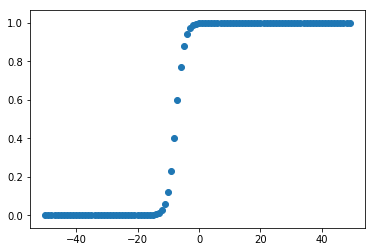

x_train: [[ 49.   6. -36. -50. -39.  24. -46.  35.  38. -40. -38.  -5. -20. -48.
  -47.  36.  -6.  32.  29.  11.  28.   9. -31.  45. -27.  47. -49.  14.
   12. -19. -42.  31.  19.  26.  15. -45. -16.   2. -15.  43.  -9.  27.
   37.   4. -28. -33. -35.  18.  39. -21. -17.  -8.  23. -18.  10.  46.
  -29. -41.   7. -26.  40.  42.  41.  20. -11. -13. -37.  -2.  -3.   0.
   16. -10. -12. -34.  13.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.]]
y_train: [1.00000000e+00 9.99979601e-01 1.25338881e-10 1.71390843e-15
 1.13704867e-11 1.00000000e+00 4.20465104e-14 1.00000000e+00
 1.00000000e+00 5.10908903e-12 2.53054836e-11 8.80797078e-01
 4.53978687e-05 8.4890

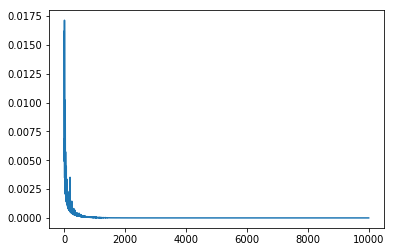

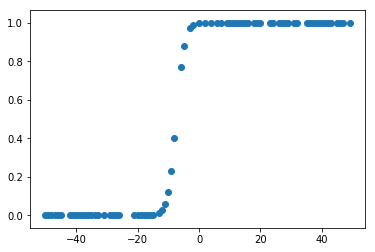

w: 0.7999893237703735
b: 5.999907266260179
10000
74


In [69]:
# lr = 0.0001   max_iter = 10000     
if __name__ == '__main__':
    run()

## 学习率为1，迭代步为1万左右，模型收敛